In [32]:
from fft import *

In [33]:
def correlate(x_n, N):
    X_k = np.fft.fft(x_n, N)
    X_p = 1 / N * np.abs(X_k)**2
    corr = np.fft.ifft(X_p, N)
    return corr

### Exercise 3

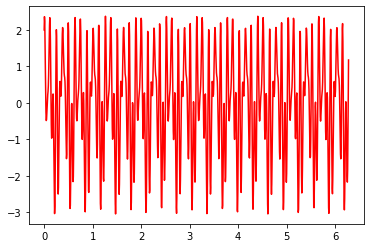

In [34]:
N = 1024
x = np.arange(0, 2 * np.pi, 2 * np.pi / N)
x_n = np.sin(20 * x) + np.cos(50 * x) + np.sin(80 * x) + np.cos(100 * x)
plt.plot(x, x_n, 'r-')
plt.show()

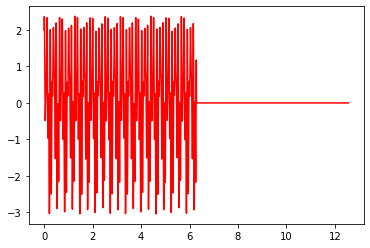

In [35]:
x_n_pad = np.append(x_n, np.zeros(N), axis=0)
x_pad = np.arange(0, 4 * np.pi, 2 * np.pi / N)
plt.plot(x_pad, x_n_pad, 'r-')
plt.show()

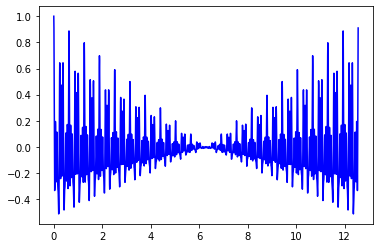

In [36]:
x_pad_corr = correlate(x_n_pad, 2 * N)
plt.plot(x_pad, x_pad_corr, 'b-')
plt.show()

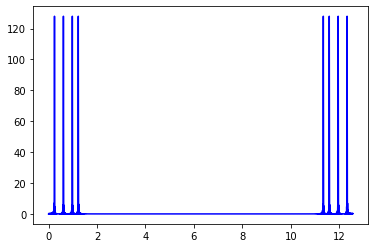

In [37]:
P_x = np.fft.fft(x_pad_corr)
plt.plot(x_pad, P_x, 'b-')
plt.show()

In [39]:
print(np.var(P_x))

84.38788630740976


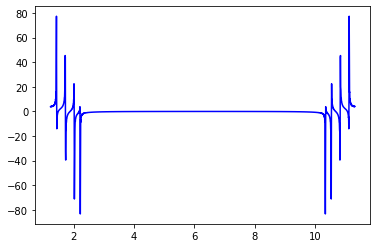

In [44]:
window_size = 200
x_pad_corr_cut = x_pad_corr[window_size:-window_size]
P_x_cut = np.fft.fft(x_pad_corr_cut)
plt.plot(x_pad[window_size:-window_size], P_x_cut, 'b-')
plt.show()

In [45]:
print(np.var(P_x_cut))

46.167843429410325


### Exercise 4

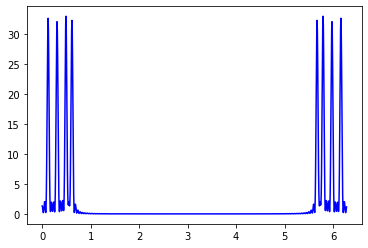

In [53]:
#Welch Average
x = np.arange(0, 2 * np.pi, 2 * np.pi / N)
x_n = np.sin(20 * x) + np.cos(50 * x) + np.sin(80 * x) + np.cos(100 * x)

N = 1024
M = 128
overlap = 64
n = int((N - overlap) / (M - overlap))
P_x = np.zeros(N)
for i in range(n):
    mask = np.zeros(N)
    mask[i * (M - overlap):i * (M - overlap) + M] = 1
    x_n_slice = x_n * mask
    P_x_slice = np.abs(np.fft.fft(x_n_slice))**2
    P_x += P_x_slice
P_x /= M * n

plt.plot(x, P_x, 'b-')
plt.show()

In [54]:
print(np.var(P_x))

40.094019674616746
